In [1]:
# This is an SyMANTIC Run on Colab with exponential and logarithms
# Install libraries
%pip install symantic

In [2]:
# Call Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from symantic import SymanticModel
import time
#import math
import sympy as sym

# Molecular Mass Dataset
Here we will take a first look at the molecular mass dataset, taken from [Goossens.](https://pubs.acs.org/doi/full/10.1021/ie950484l?casa_token=-Vy315d8K38AAAAA%3Anxdm5rReXldLbOrBYLfwm0l3MmsCw_Mbnw1vVdNJ308Ki_3lEcnU3bXQmS8TL2nsArNG-AydRFEKVZc)


In [3]:
# Positron
#df=pd.read_csv('./goossens_raw.csv')
#df=pd.read_csv('./c694/goossens_raw.csv')
#Colab
drive.mount('/content/drive')
df0=pd.read_csv('/content/drive/MyDrive/goossens_raw.csv')

Mounted at /content/drive


In [4]:
#y=df['MW']
#x=df[['SG','TBP']]
df=df0.astype('float64')
new_order=['MW','SG','TBP']
df=df.reindex(columns=new_order)
print(df.dtypes)

MW     float64
SG     float64
TBP    float64
dtype: object


Expanded feature space is:: 194742
!!Warning:: Further feature expansions result in memory consumption, Please provide the input to consider feature expansion or to exit the run with the sparse models created!!!
Do you wish to continue (yes/no)? n
Exiting based on user input.
************************************************  Please take a look at the entire pareto set generated!!! *******************************************************


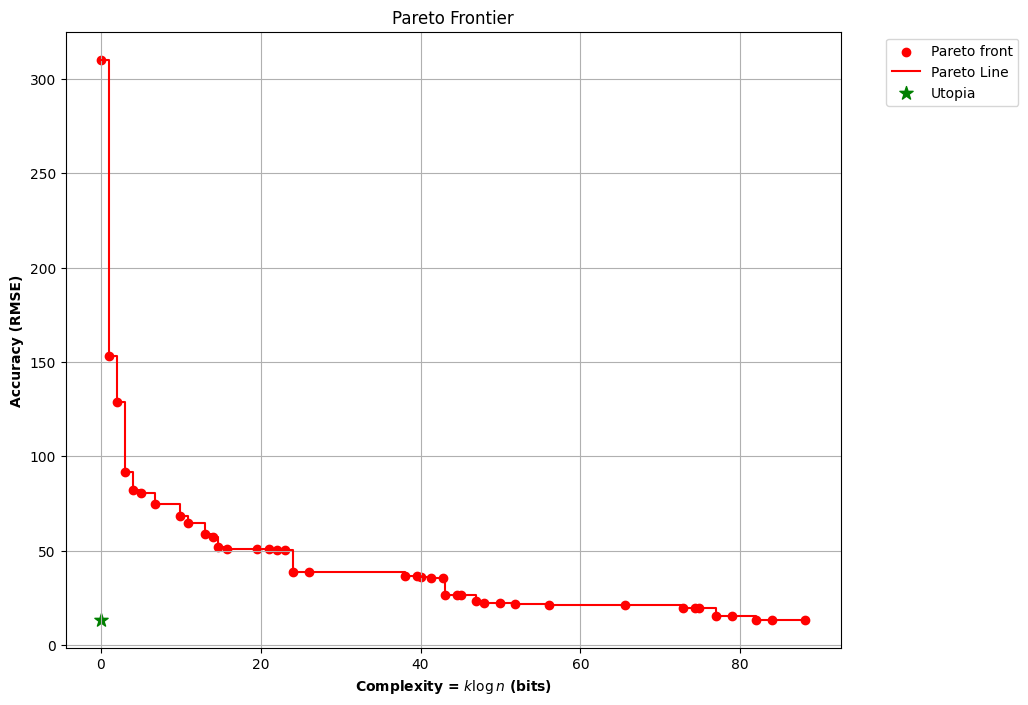

time to fit:  43.84687256813049 seconds


In [5]:
t0 = time.time()
myMod=SymanticModel(df=df,
                    operators = ['+','-','*','/','exp','log'])
res=myMod.fit()
myMod.plot_pareto_front()
#m=res[0]['utopia']['expression']
#y_pred=myMod.predict(x)
print("time to fit: ",time.time() - t0, 'seconds')

In [6]:
myEq=res[0]['utopia']['expression']
print(myEq)

-0.0041*(TBP*(SG-TBP)) + 879.0904*(exp(SG)) + -4.1603*(SG*TBP) - 1166.6935


In [7]:
sym.simplify(myEq)

-4.1644*SG*TBP + 0.0041*TBP**2 + 879.0904*exp(SG) - 1166.6935

In [17]:
def muth_Mw(sg,tbp):
  a00= -4.1644
  a01= 0.0041
  a02= 879.0904
  a03= -1166.6935
  mw=a00*sg*tbp+a01*(tbp**2)+a02*np.exp(sg)+a03
  return mw


In [18]:
y_muth=np.zeros(len(df))
for i in range(len(df)):
    y_muth[i]=muth_Mw(df.at[i,'SG'],df.at[i,'TBP'])

df['Fit_Mw']=y_muth
df.corr()


,MW,SG,TBP,Fit_Mw
MW,1.000000,0.334852,0.869591,0.985800
SG,0.334852,1.000000,0.625218,0.346737
TBP,0.869591,0.625218,1.000000,0.891773
Fit_Mw,0.985800,0.346737,0.891773,1.000000


### Results
Let's take a peek at how the predicted molecular mass looks compared to the actual:

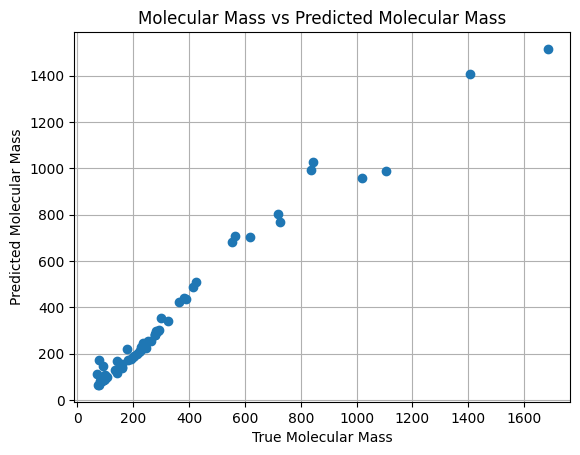

In [19]:
plt.plot(df['MW'],y_muth,marker="o",linestyle="None")
plt.xlabel('True Molecular Mass')
plt.ylabel('Predicted Molecular Mass')
plt.title('Molecular Mass vs Predicted Molecular Mass')
plt.grid()
plt.show()

In [20]:
# Import Hosseinifar Dataset

# Colab Version
#drive.mount('/content/drive')
dfh=pd.read_csv('/content/drive/MyDrive/hosseinifar_raw.csv')
# Positron Version
#dfh=pd.read_csv('./hosseinifar_raw.csv')
# RStudio Version
# dfh=pd.read_csv('./c694/goossens_raw.csv')

In [21]:
# Predict Hosseinifar
#yh=dfh['MW']
#xh=dfh[['SG','TBP']]
#y_hoss=myMod.predict(xh)

z_muth=np.zeros(len(dfh))
for i in range(len(dfh)):
    z_muth[i]=muth_Mw(dfh.at[i,'SG'],dfh.at[i,'TBP'])

dfh['Fit_Mw']=z_muth
dfh.corr()


,SG,TBP,MW,Fit_Mw
SG,1.000000,0.985561,0.954145,0.926199
TBP,0.985561,1.000000,0.990235,0.974726
MW,0.954145,0.990235,1.000000,0.996331
Fit_Mw,0.926199,0.974726,0.996331,1.000000
